In [1]:
#import all required liabraries
#WE use Box-Cox,log,sqrt Transform technique to remove skewness from columns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LarsCV,ElasticNet,ElasticNetCV,LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import librosa
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [83]:
#convert .csv file into DataFrame format 
df=pd.read_csv(r"C:\Users\Ashish\Desktop\Datasets\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [84]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [87]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

we have mix datastructure like object and int.as we know that ML not accept the object ,so we have to convert them in int by using Encoding technique

In [88]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#there is no null data in dataset

In [89]:
#for convert the object we use encoder for column "Attrition" and "Gender"
comman_encod=LabelEncoder()

#Encode the Attrition from object to int
Attr_data = comman_encod.fit_transform(df['Attrition'])
Attrition = pd.Series(Attr_data)

#Encode the Gender from object to int
gdr_data = comman_encod.fit_transform(df['Gender'])
Gender = pd.Series(gdr_data)


#Encode the Department from object to int
dept_data = comman_encod.fit_transform(df['Department'])
Department = pd.Series(dept_data)


#Encode the BusinessTravel from object to int
dept_data = comman_encod.fit_transform(df['BusinessTravel'])
BusinessTravel = pd.Series(dept_data)


#Encode the EducationField from object to int
Edu_Field = comman_encod.fit_transform(df['EducationField'])
EducationField = pd.Series(Edu_Field)


#Encode the JobRole from object to int
job_role = comman_encod.fit_transform(df['JobRole'])
JobRole = pd.Series(job_role)


#Encode the MaritalStatus from object to int
marital_status = comman_encod.fit_transform(df['MaritalStatus'])
MaritalStatus = pd.Series(marital_status)

#Encode the Over18 from object to int
Over_18 = comman_encod.fit_transform(df['Over18'])
Over18 = pd.Series(Over_18)

#Encode the OverTime from object to int
Over_Time = comman_encod.fit_transform(df['OverTime'])
OverTime = pd.Series(Over_Time)


#assign encoded data to its origional column in original data set
df['Attrition'] = Attrition
df['Gender'] = Gender
df['Department'] = Department
df['BusinessTravel'] = BusinessTravel
df['EducationField'] = EducationField
df['JobRole'] = JobRole
df['MaritalStatus'] = MaritalStatus
df['Over18'] = Over18
df['OverTime'] = OverTime

In [90]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [91]:
print("Total 0's are =>",df.iloc[:,1].value_counts()[0])
print("Total 1,s are =>",df.iloc[:,1].value_counts()[1])

Total 0's are => 1233
Total 1,s are => 237


In [92]:
yes = df[df.Attrition==0]
no = df[df.Attrition==1]

In [93]:
yes.shape

(1233, 35)

In [94]:
no.shape

(237, 35)

In [95]:
df.shape

(1470, 35)

In [96]:
#Duplicate Removal
df.drop_duplicates(inplace=True)
df.shape

(1470, 35)

#There is no duplicates in given data

#### Analyze data by using dist. plot

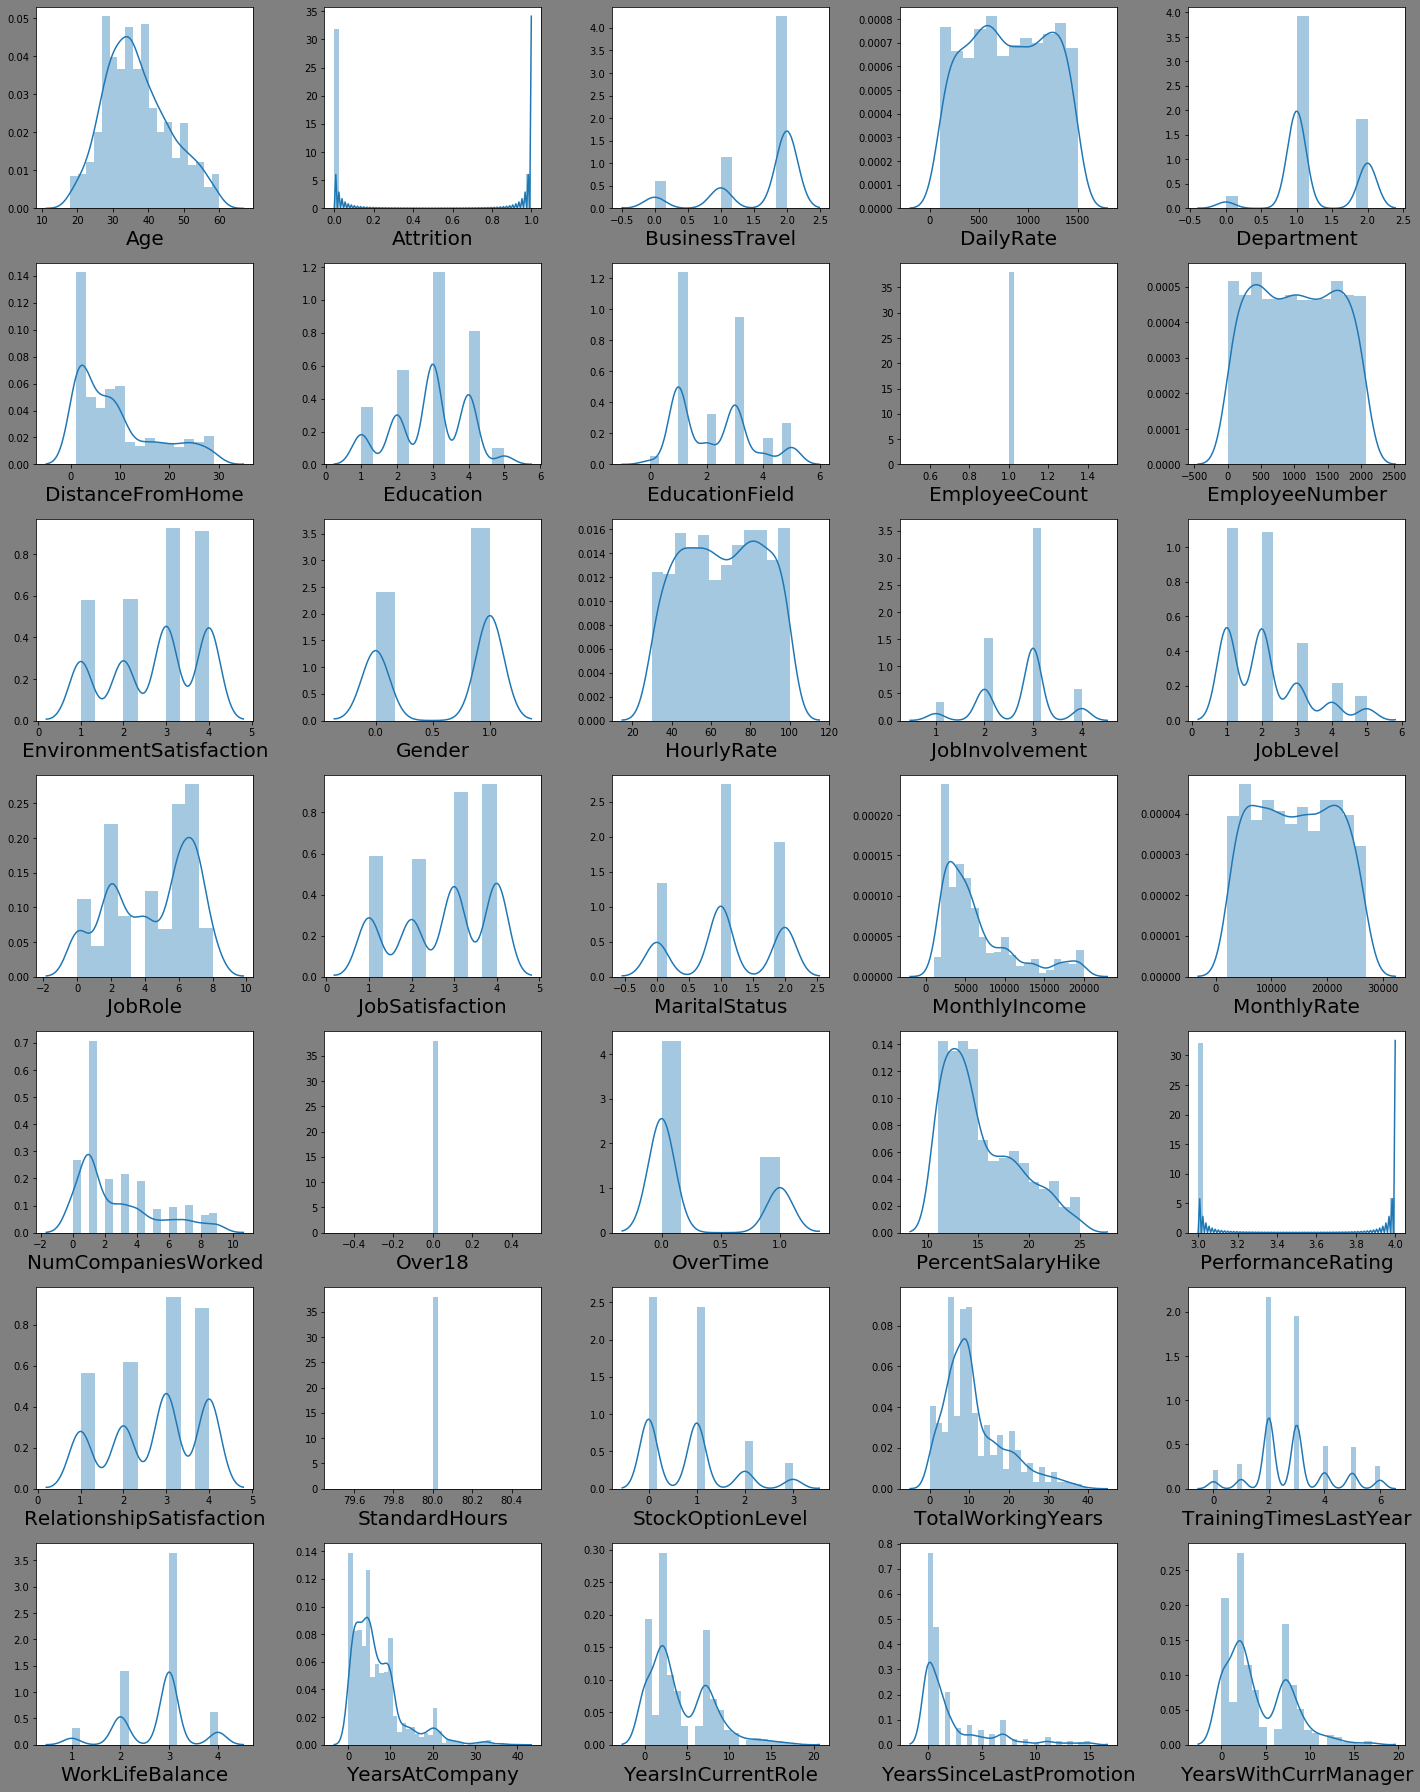

In [15]:
#let see how data is distribute in every column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=35:
        ax=plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Remove unwanted column

which are not useful for us

In [97]:
df=df.drop(columns = ['EmployeeCount' , 'Over18' , 'StandardHours'], axis = 1)

In [98]:
#after removing unwanted columns
df.shape

(1470, 32)

##### OBSERVATION :
    All given features are not a single type features .some are contenious and some of them are ctaegorical varibales .
    Removing skewness or outliers we only can consider the contenious features.

In [99]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Contenious Vaibale of data:
'Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike'

#### OBSERVATION :-
    As per observ. there is not much more skewness in our contenious vaiable Except 'Monthly Income' Feature.

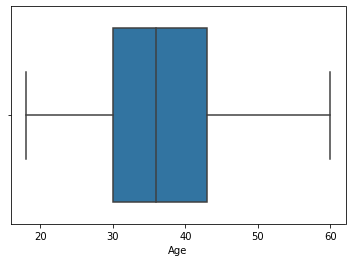

In [100]:
sns.boxplot(df['Age'])

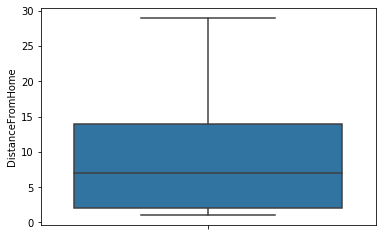

In [101]:
sns.boxplot(df['DistanceFromHome'],orient='v')

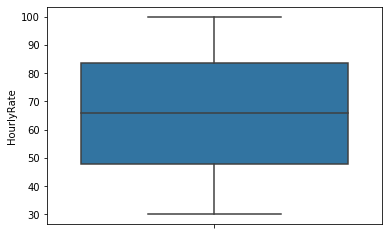

In [102]:
sns.boxplot(df['HourlyRate'],orient='v')

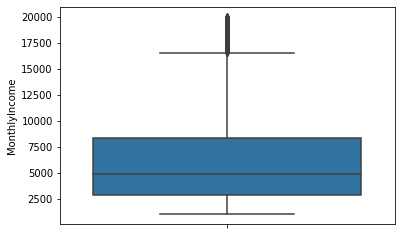

In [103]:
sns.boxplot(df['MonthlyIncome'],orient='v')
#OUtlier detected in feature

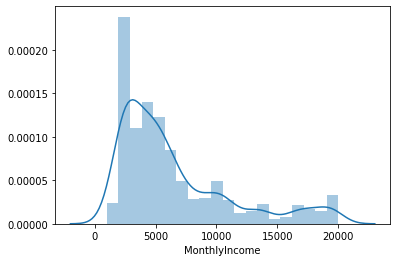

In [104]:
#Distplot is al;so showing the Right skewness
sns.distplot(df['MonthlyIncome'])

In [105]:
#Before Removing skew./Outlier
df['MonthlyIncome'].skew()

1.3698166808390662

In [106]:
df['MonthlyIncome']=np.log(df['MonthlyIncome'])
pd.Series(df['MonthlyIncome']).skew()
#After removing outlier

0.2861922926389174

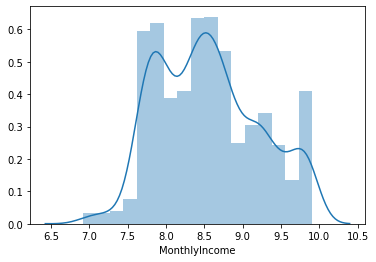

In [107]:
sns.distplot(df['MonthlyIncome'])
#Dist. after removing right skewness

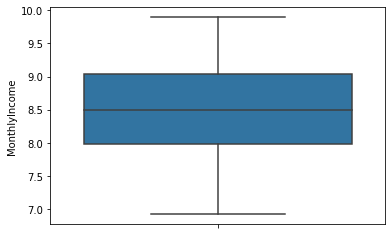

In [108]:
#Box plot after removing outliers
sns.boxplot(df['MonthlyIncome'],orient='v')

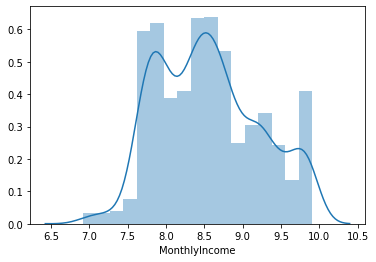

In [109]:
sns.distplot(df['MonthlyIncome'])

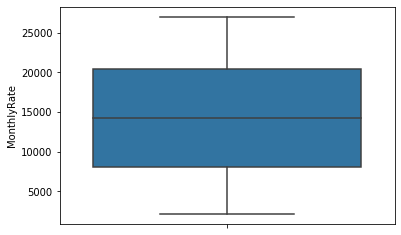

In [110]:
sns.boxplot(df['MonthlyRate'],orient='v')

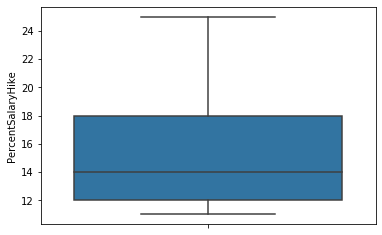

In [111]:
sns.boxplot(df['PercentSalaryHike'],orient='v')

In [112]:
#Bifurcate Labels/Dependant AND features/independant variable 
x = df.drop(columns = ['Attrition'])
y = df['Attrition']

#### For Feature Selection We use VIF

Now we process by checking the muticolliniarity in the dependant vaiable before that we should scale our data 

In [113]:
#Scaled all required features
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [114]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

In [115]:
vif

,vif,Features
0,2.050941,Age
1,1.016056,BusinessTravel
2,1.026431,DailyRate
3,1.931593,Department
4,1.013270,DistanceFromHome
5,1.067558,Education
6,1.016257,EducationField
7,1.023404,EmployeeNumber
8,1.019872,EnvironmentSatisfaction
9,1.019795,Gender


###### There is not any column which have VIF>10 , it mean none of the column have muticolliniarety

#we found that our data is completely imbalanced, so while applying linera regression we use "stratify = y"

#### Train The Model

### By Using LogisticRegressionCV

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.83,stratify = y)

In [154]:
reg=LogisticRegressionCV(max_iter=2000,cv = 8)

reg.fit(x_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=8, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=2000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Let's see how well our model perform on dataset

In [155]:
y_pred = reg.predict(x_test)

##### Evalution of model:

In [156]:
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.876

In [157]:
#Confusion mtrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[206,   4],
       [ 27,  13]], dtype=int64)

##### Find the other Evolution O/P by slicing confusion matrix

In [158]:
t_p=conf_mat[0][0]
f_p=conf_mat[0][1]
f_n=conf_mat[1][0]
t_n=conf_mat[1][1]

In [159]:
Precision = t_p/(t_p+f_p)
Precision

0.9809523809523809

In [160]:
Recall = t_p/(t_p+f_n)
Recall

0.8841201716738197

In [161]:
#our data is not completely balanced we should consider f1 score more than accurecy
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9300225733634311

In [162]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6529761904761905

In [163]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [164]:
fpr

array([0.        , 0.01904762, 1.        ])

In [165]:
tpr

array([0.   , 0.325, 1.   ])

In [166]:
thresholds

array([2, 1, 0])

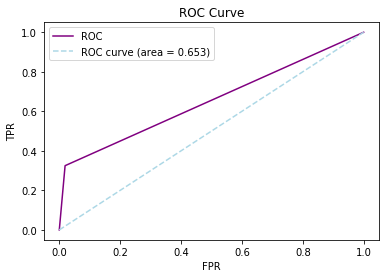

In [167]:
plt.plot(fpr,tpr,color='purple',label='ROC')
plt.plot([0,1],[0,1],color='lightblue',linestyle='--',label='ROC curve (area = %0.3f)'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [168]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       210
           1       0.76      0.33      0.46        40

    accuracy                           0.88       250
   macro avg       0.82      0.65      0.69       250
weighted avg       0.87      0.88      0.85       250



### KNeighborsClassifier (Hold out method)

In [132]:
#Building model to test unexposed Data by using KNeighborsClassifier (Hold out method)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.80,stratify = y)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [133]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[246,   1],
       [ 47,   0]], dtype=int64)

In [134]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



### Let Us GridSearchCV for the best parameter to improve accuracy

In [177]:
#Find Best(sutable) params for model building which help us to achieve good accurecy
param_grid={'algorithm' : ['kd_tree','brute'],'leaf_size' : [26,22,9,8,14,19,12], 'n_neighbors' : [5,7,13,4,5,12,18,8,10,15]}

In [178]:
#test all params on build model
gridsearch = GridSearchCV(estimator=knn , param_grid=param_grid)

In [179]:
#train model on all possible parmutaions and combination of provided parameters.that which parameter combination gives us best accurecy.
gridsearch.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [26, 22, 9, 8, 14, 19, 12],
                         'n_neighbors': [5, 7, 13, 4, 5, 12, 18, 8, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [180]:
#Best(sutable) params for model building which help us to achieve good accurecy
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 26, 'n_neighbors': 4}

In [181]:
#we will use best parameters in our K-NN algo and will again check accuracy
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=26,n_neighbors=4)

In [182]:
#train the model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=26, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [183]:
#predict the O/P of test set
y_pred=knn.predict(x_test)

In [184]:
#compare test result with actual result
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[209,   1],
       [ 37,   3]], dtype=int64)

In [185]:
#Classification report
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       210
           1       0.75      0.07      0.14        40

    accuracy                           0.85       250
   macro avg       0.80      0.54      0.53       250
weighted avg       0.83      0.85      0.79       250



### Bagging classifier

In [186]:
from sklearn.ensemble import BaggingClassifier

In [187]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

knn.score(x_test,y_test)

0.836

In [188]:
#after applying Bagging
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=13),n_estimators=5,
                            max_samples=0.9,bootstrap=True,random_state=4,oob_score=True)

In [189]:
bag_knn.fit(x_train,y_train)

bag_knn.score(x_test,y_test)

0.848

In [190]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       210
           1       0.75      0.07      0.14        40

    accuracy                           0.85       250
   macro avg       0.80      0.54      0.53       250
weighted avg       0.83      0.85      0.79       250



### after applying Bagging where Bootstrap=False

In [174]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=5,
                            max_samples=0.9,bootstrap=False,random_state=4)

In [175]:
pasting_knn.fit(x_train,y_train)

pasting_knn.score(x_test,y_test)

0.844

In [176]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       210
           1       0.76      0.33      0.46        40

    accuracy                           0.88       250
   macro avg       0.82      0.65      0.69       250
weighted avg       0.87      0.88      0.85       250



without apply bootstrap we are getting same result which we are getting after applying boot strap

### Apply SVM

In [205]:
from sklearn.svm import SVC

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=0.76,stratify = y)

In [207]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [208]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[294,   2],
       [ 44,  13]], dtype=int64)

In [210]:
#Now we'll find the accurecy of model ....
print(classification_report(y_test,y_pred,digits = 2))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       296
           1       0.87      0.23      0.36        57

    accuracy                           0.87       353
   macro avg       0.87      0.61      0.64       353
weighted avg       0.87      0.87      0.84       353



Conclusion:
    
    We can consider the LogisticRegressionCV as our best Algo. Bcz we are getting same score in others what we had got in LogisticRegressionCV.

In [211]:
#after reaching on maximum accurecy of model we have to save the model
import pickle

In [212]:
filename='finalmodel.pickle'
pickle.dump(LogisticRegressionCV,open(filename,'wb'))

#prediction using saved model
loaded_model = pickle.load(open(filename, 'rb'))